# Project Description

Based on the [data](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv) provided by [http://www.randalolson.com](http://www.randalolson.com) this project visualizes the gender gap in college majors on the bachelor level.

# Import Libaries

In [5]:
import io
import os
import urllib.request

from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Set Global Varibles

In [2]:
URL = 'http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv'
PATH_DATASET = 'data/' + URL.split('/')[-1]

# Project Preparation

## Download the data

In [6]:
def download_csv_data(url):
    """Download a csv file and stores it in the data folder of the project repository.

    Args:
        URL of the csv file

    Returns:
        None
    """
    ### Create data dir if not exts
    if not os.path.exists('data/'):
        os.makedirs('data/')
        
    file = urllib.request.urlopen(url)

    df = pd.read_csv(io.TextIOWrapper(file))

    filename = url.split('/')[-1]
    path = 'data/' + filename
    df.to_csv(path, header=True, index=False, sep=',')

"""
Downloads the data to the data folder of a local repository after you run it once you can uncomment this lines.
To prevent the code from downloading the data every time you run the code.
"""    
download_github_csv_data(URL)

## Load the data

In [7]:
### Load the data as df in the var data
data = pd.read_csv(PATH_DATASET)
### Inspect the first 5 rows of the dataset
display(data.head())

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


# Analysis

## Visualize the proportion of men and women in coman college majors

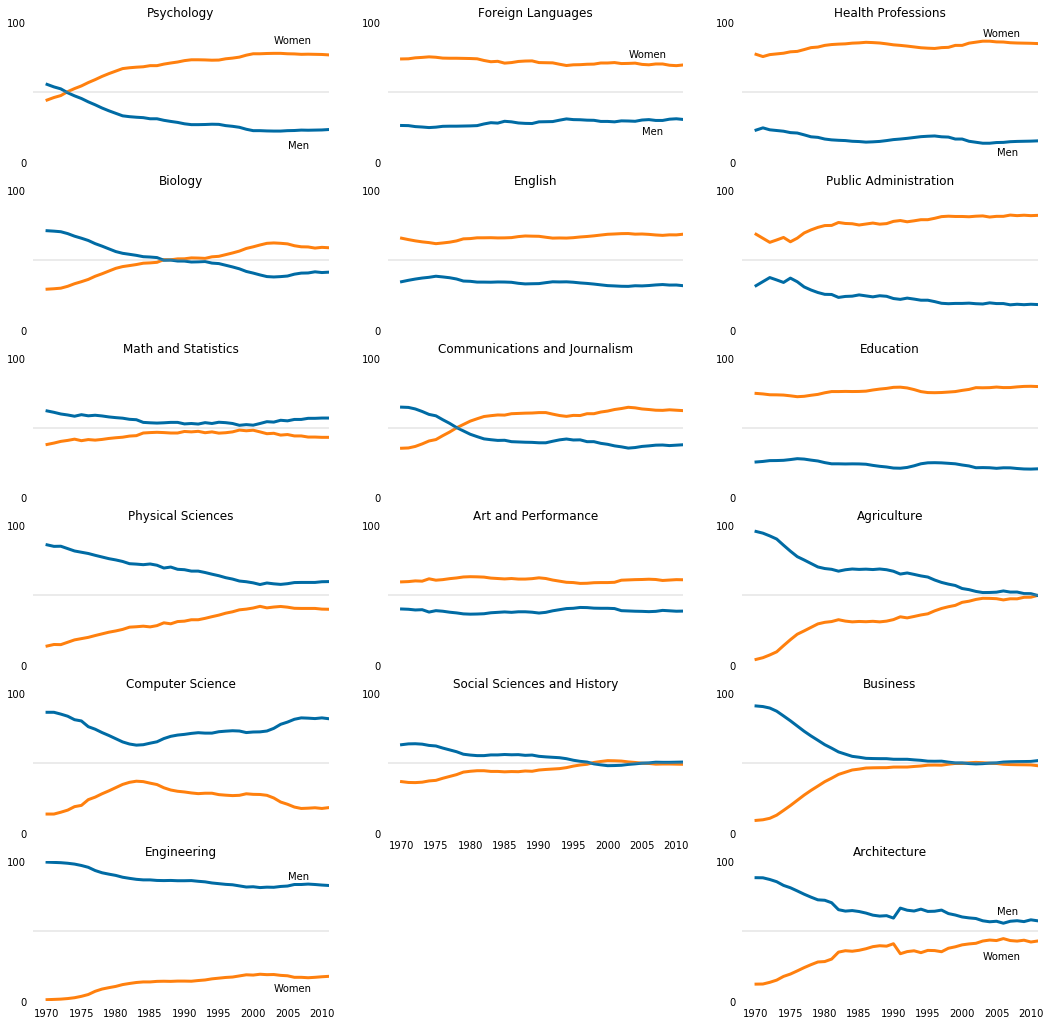

In [17]:
### Set the colors for the visualization
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

### Group the college majors in categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(18,18))

for sp in range(0,18,3):
    index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    
    ax.plot(data['Year'], data[stem_cats[index]], c=cb_orange, label='Women', linewidth=3)
    ax.plot(data['Year'], 100-data[stem_cats[index]], c=cb_dark_blue, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    if sp == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif sp == 15:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')
        
for sp in range(1,16,3):
    index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    
    ax.plot(data['Year'], data[lib_arts_cats[index]], c=cb_orange, label='Women', linewidth=3)
    ax.plot(data['Year'], 100-data[lib_arts_cats[index]], c=cb_dark_blue, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    if sp == 1:
        ax.text(2003, 75, 'Women')
        ax.text(2005, 20, 'Men')
    elif sp == 13:
        ax.tick_params(labelbottom='on')
        
for sp in range(2,20,3):
    index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    
    ax.plot(data['Year'], data[other_cats[index]], c=cb_orange, label='Women', linewidth=3)
    ax.plot(data['Year'], 100-data[other_cats[index]], c=cb_dark_blue, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    
    
    if sp == 2:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 17:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
            
plt.show()